<a href="https://colab.research.google.com/github/lililibin2022/CCHA-YOLO/blob/main/peanut_af_train_yolo11_instance_segmentation_on_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLO11 Instance Segmentation on a Custom Dataset

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

YOLO11 builds on the advancements introduced in YOLOv9 and YOLOv10 earlier this year, incorporating improved architectural designs, enhanced feature extraction techniques, and optimized training methods.

YOLO11m achieves a higher mean mAP score on the COCO dataset while using 22% fewer parameters than YOLOv8m, making it computationally lighter without sacrificing performance.

YOLOv11 is available in 5 different sizes, ranging from `2.6M` to `56.9M` parameters, and capable of achieving from `39.5` to `54.7` mAP on the COCO dataset.

## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [3]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/107.7 GB disk)


## Inference with model pre-trained on COCO dataset

### CLI

**NOTE:** CLI requires no customization or Python code. You can simply run all tasks from the terminal with the yolo command.

In [ ]:
!yolo task=detect mode=predict model=yolo11l-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

100% 53.5M/53.5M [00:01<00:00, 46.2MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11l-seg summary (fused): 491 layers, 27,646,272 parameters, 0 gradients, 142.2 GFLOPs

100% 104k/104k [00:00<00:00, 105MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 187.4ms
Speed: 13.5ms preprocess, 187.4ms inference, 1188.5ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


**NOTE:** Result annotated image got saved in `{HOME}/runs/detect/predict/`. Let's display it.

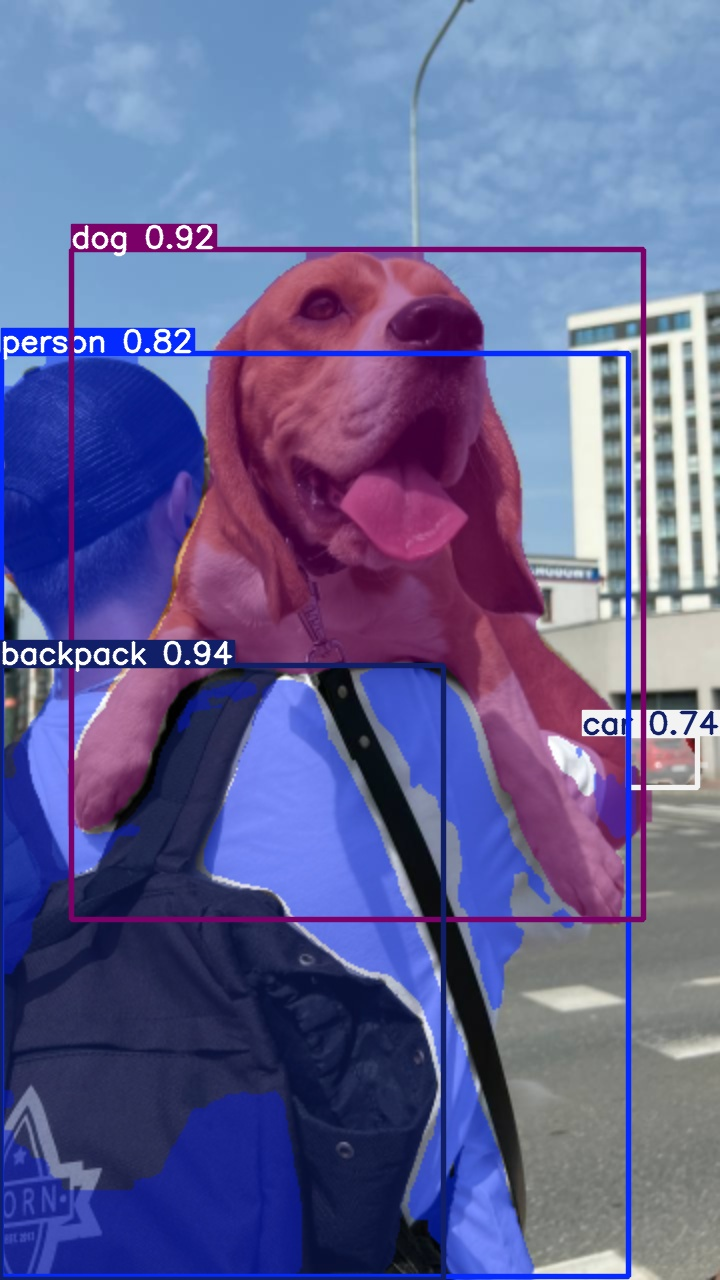

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/predict/dog.jpeg', width=600)

### SDK

**NOTE:** YOLO's Python interface allows for seamless integration into your Python projects, making it easy to load, run, and process the model's output.

In [ ]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11l-seg.pt')
image = Image.open(requests.get('https://media.roboflow.com/notebooks/examples/dog.jpeg', stream=True).raw)
result = model.predict(image, conf=0.25)[0]

100%|██████████| 53.5M/53.5M [00:00<00:00, 136MB/s]


KeyboardInterrupt: 

**NOTE:** The obtained `result` object stores information about the location, classes, and confidence levels of the detected objects.

In [ ]:
result.boxes.xyxy

tensor([[0.0000e+00, 6.6552e+02, 4.4326e+02, 1.2796e+03],
        [7.1101e+01, 2.4920e+02, 6.4366e+02, 9.1943e+02],
        [1.1703e+00, 3.5331e+02, 6.2878e+02, 1.2769e+03],
        [6.2872e+02, 7.3547e+02, 6.9789e+02, 7.8725e+02]], device='cuda:0')

In [ ]:
result.boxes.conf

tensor([0.9365, 0.9156, 0.8151, 0.7367], device='cuda:0')

In [ ]:
result.boxes.cls

tensor([24., 16.,  0.,  2.], device='cuda:0')

In [ ]:
result.masks.data

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

**NOTE:** YOLO11 can be easily integrated with `supervision` using the familiar `from_ultralytics` connector.

In [ ]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

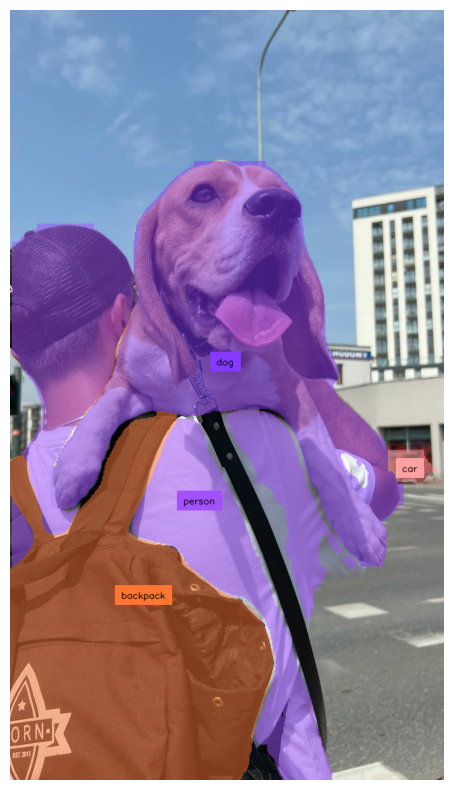

In [ ]:
mask_annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK, text_position=sv.Position.CENTER)

annotated_image = image.copy()
annotated_image = mask_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/ks-fsm9o/pelvis-ap-x-ray) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [9]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow
from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key="qpPq1VHvkPZnfWt3s5iK")
project = rf.workspace("fafu-jaxfw").project("peanuts-af-segmentation")
version = project.version(6)
dataset = version.download("yolov11")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Peanuts-AF-segmentation-6 in yolov11:: 100%|██████████| 308/308 [00:00<00:00, 3380.79it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s-seg.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True

/content
100% 19.7M/19.7M [00:00<00:00, 126MB/s] 
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/content/datasets/Peanuts-AF-segmentation-6/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False,

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					    labels.jpg	      train_batch2.jpg
BoxF1_curve.png					    MaskF1_curve.png  train_batch810.jpg
BoxP_curve.png					    MaskP_curve.png   train_batch811.jpg
BoxPR_curve.png					    MaskPR_curve.png  train_batch812.jpg
BoxR_curve.png					    MaskR_curve.png   val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv       val_batch0_pred.jpg
confusion_matrix.png				    results.png       weights
events.out.tfevents.1732028004.79f2fbd1cd79.1871.0  train_batch0.jpg
labels_correlogram.jpg				    train_batch1.jpg


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import shutil
import os

source_directory = '/content/runs/segment'
destination_directory = '/content/gdrive/MyDrive/Peanut_AF/train'  # Use the existing directory as the parent

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Copy the contents of the source directory into the destination directory
for item in os.listdir(source_directory):
    source_item = os.path.join(source_directory, item)
    destination_item = os.path.join(destination_directory, item)
    if os.path.isdir(source_item):
        shutil.copytree(source_item, destination_item)
    else:
        shutil.copy2(source_item, destination_item)

Mounted at /content/gdrive


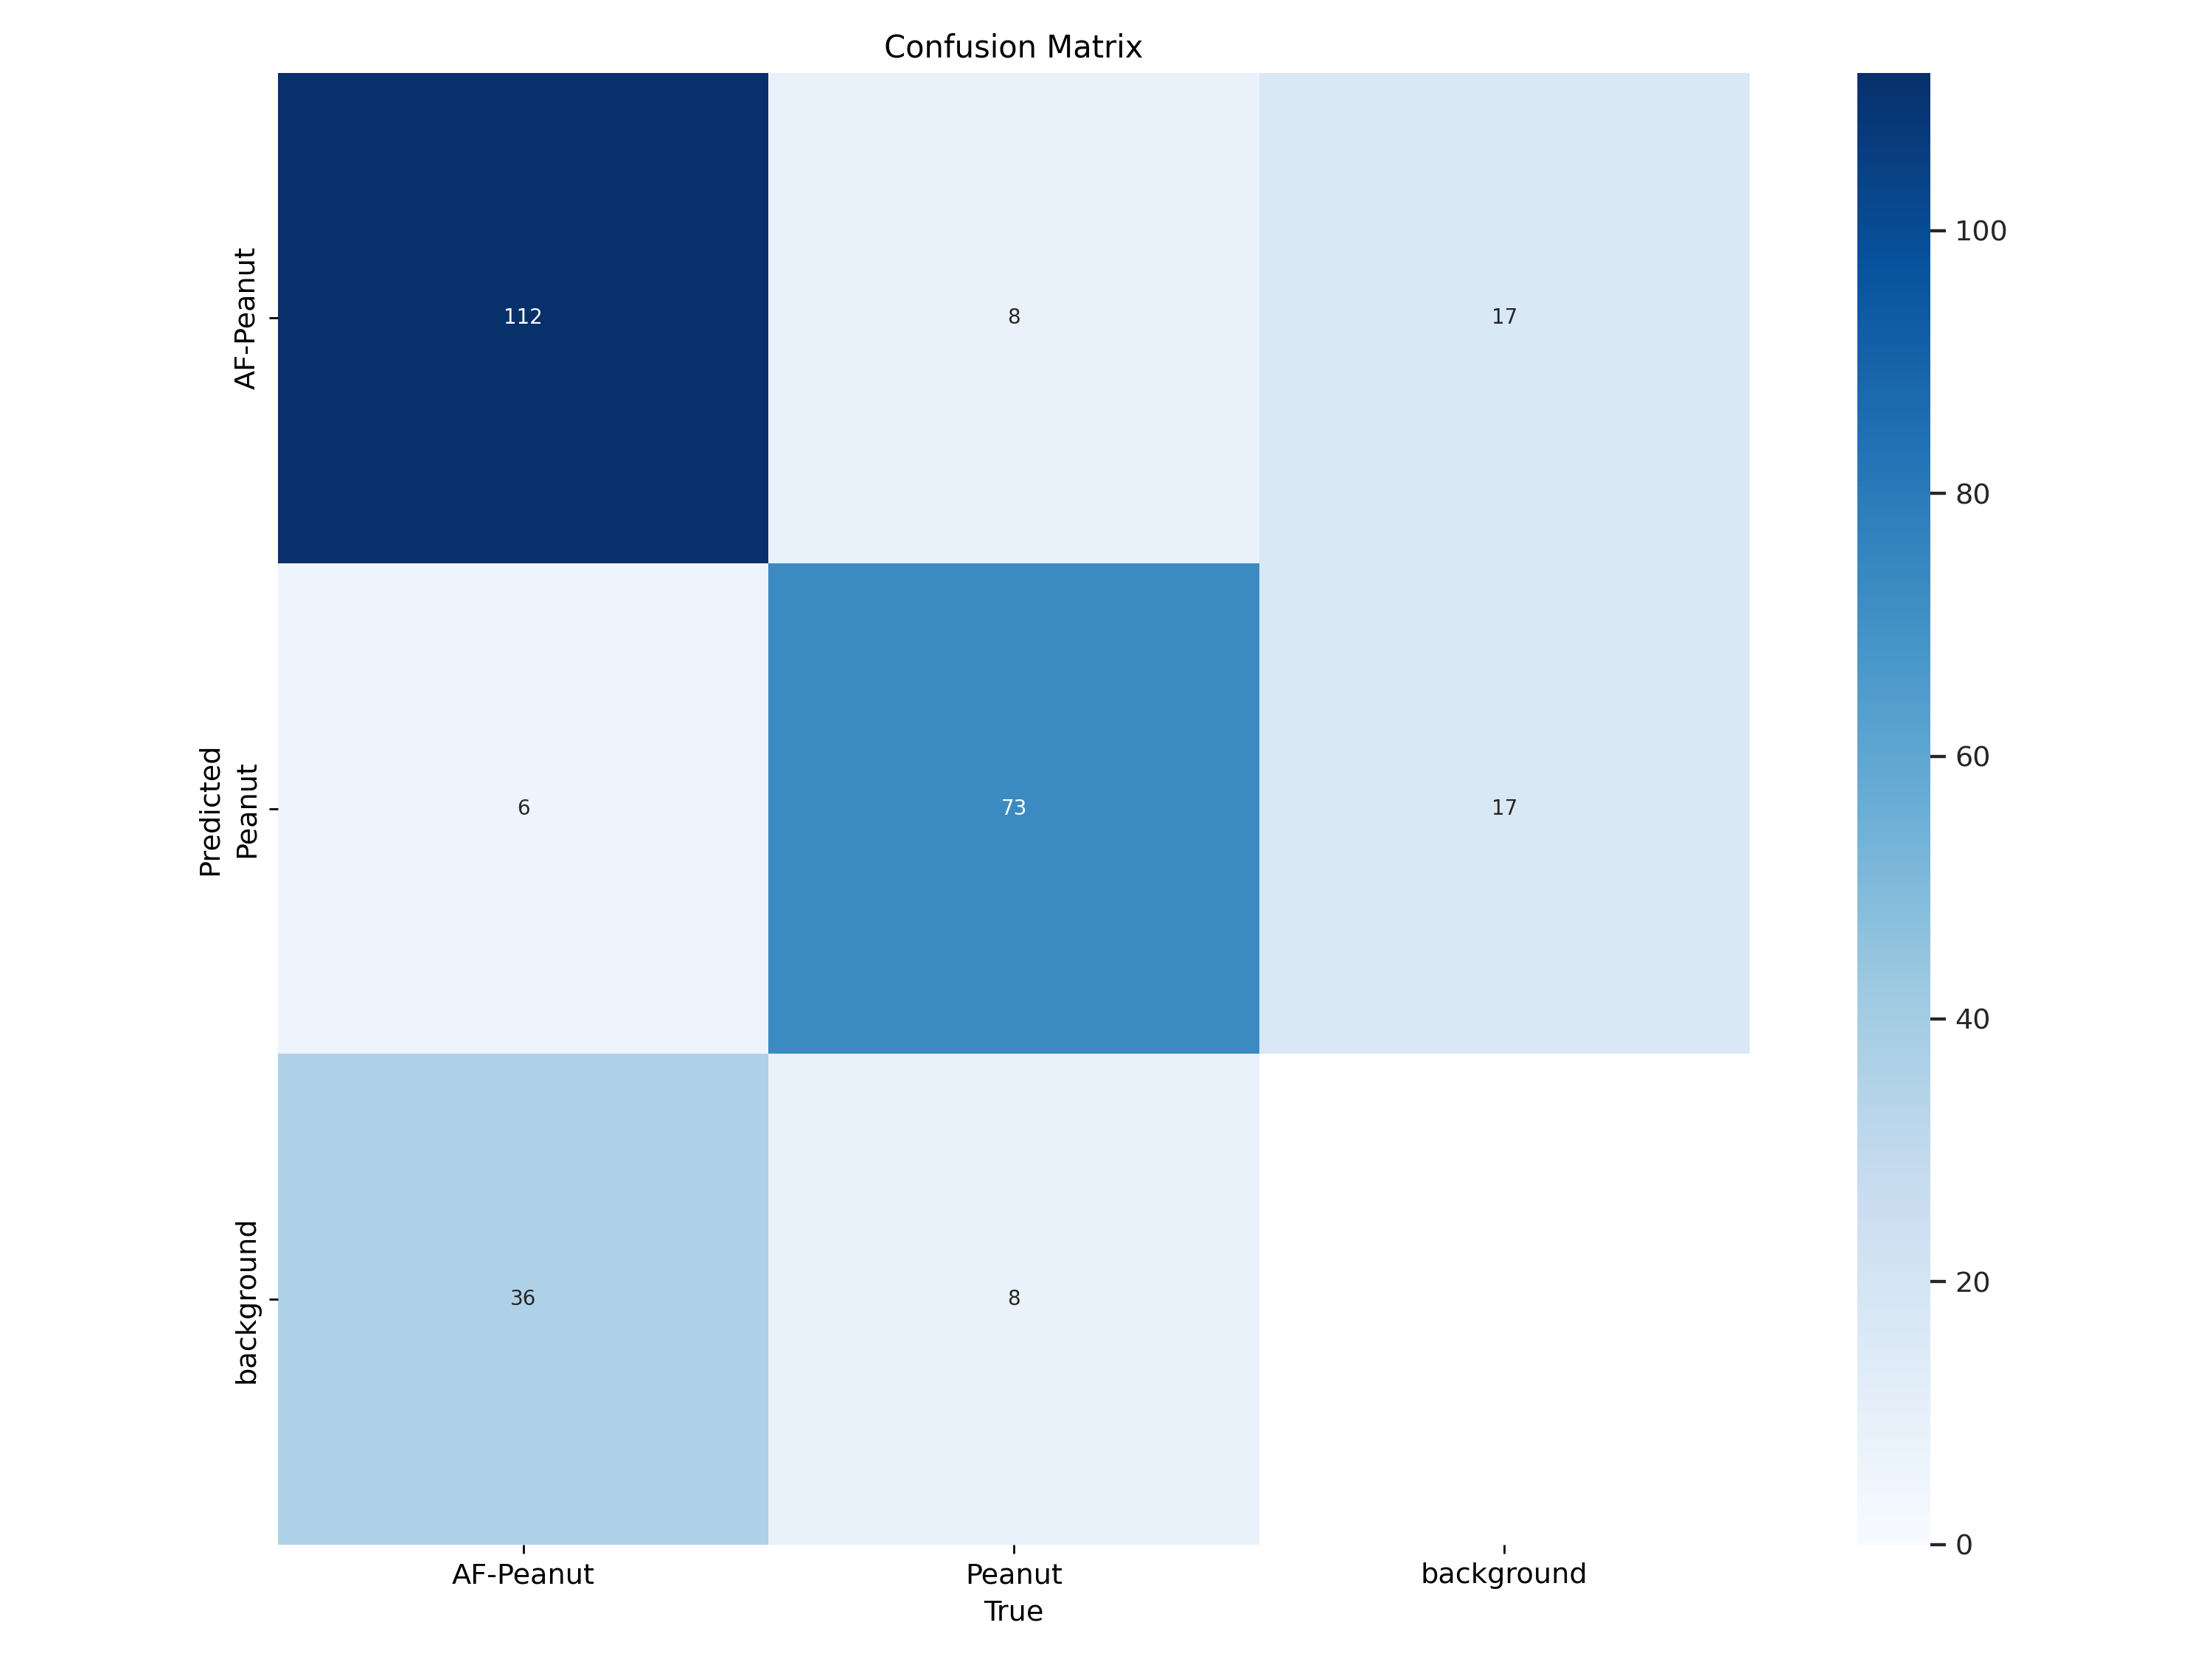

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

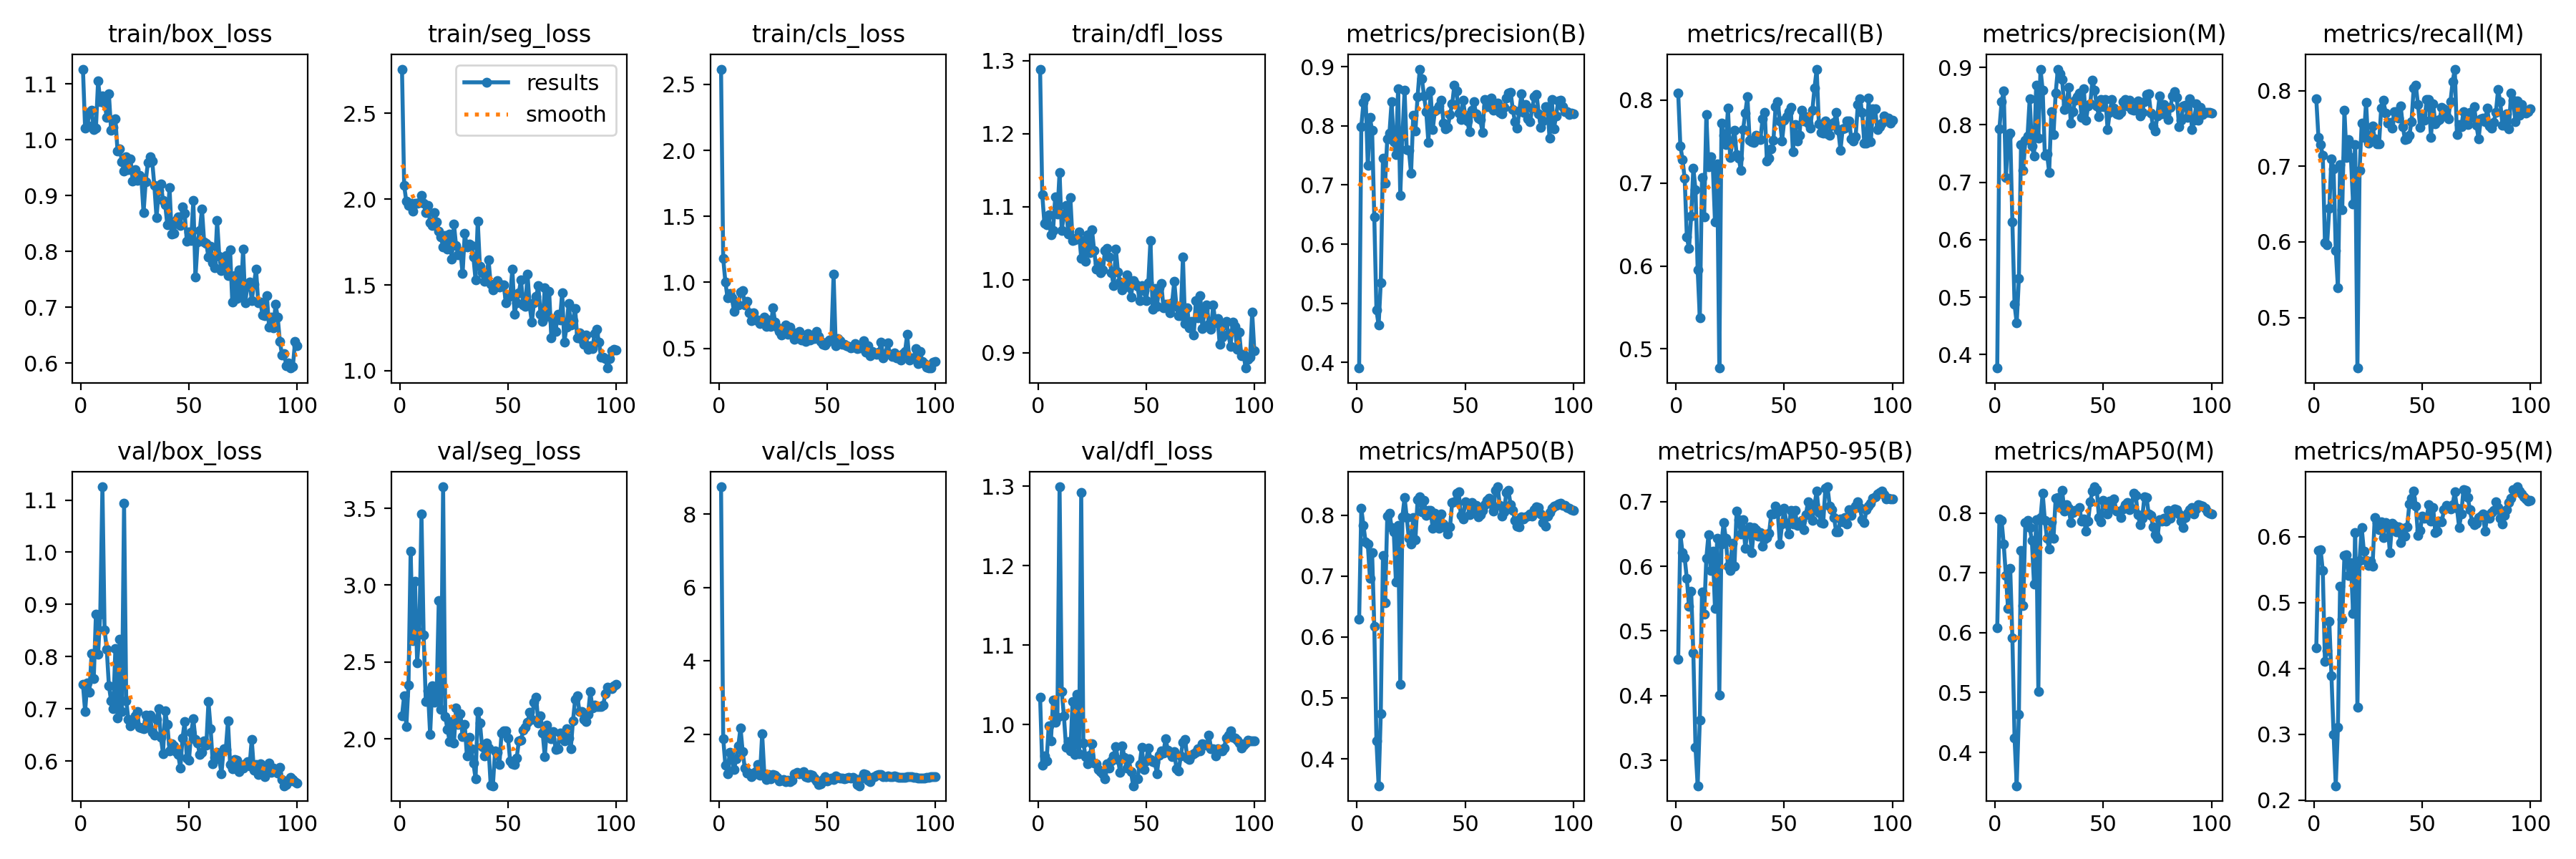

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/results.png', width=600)

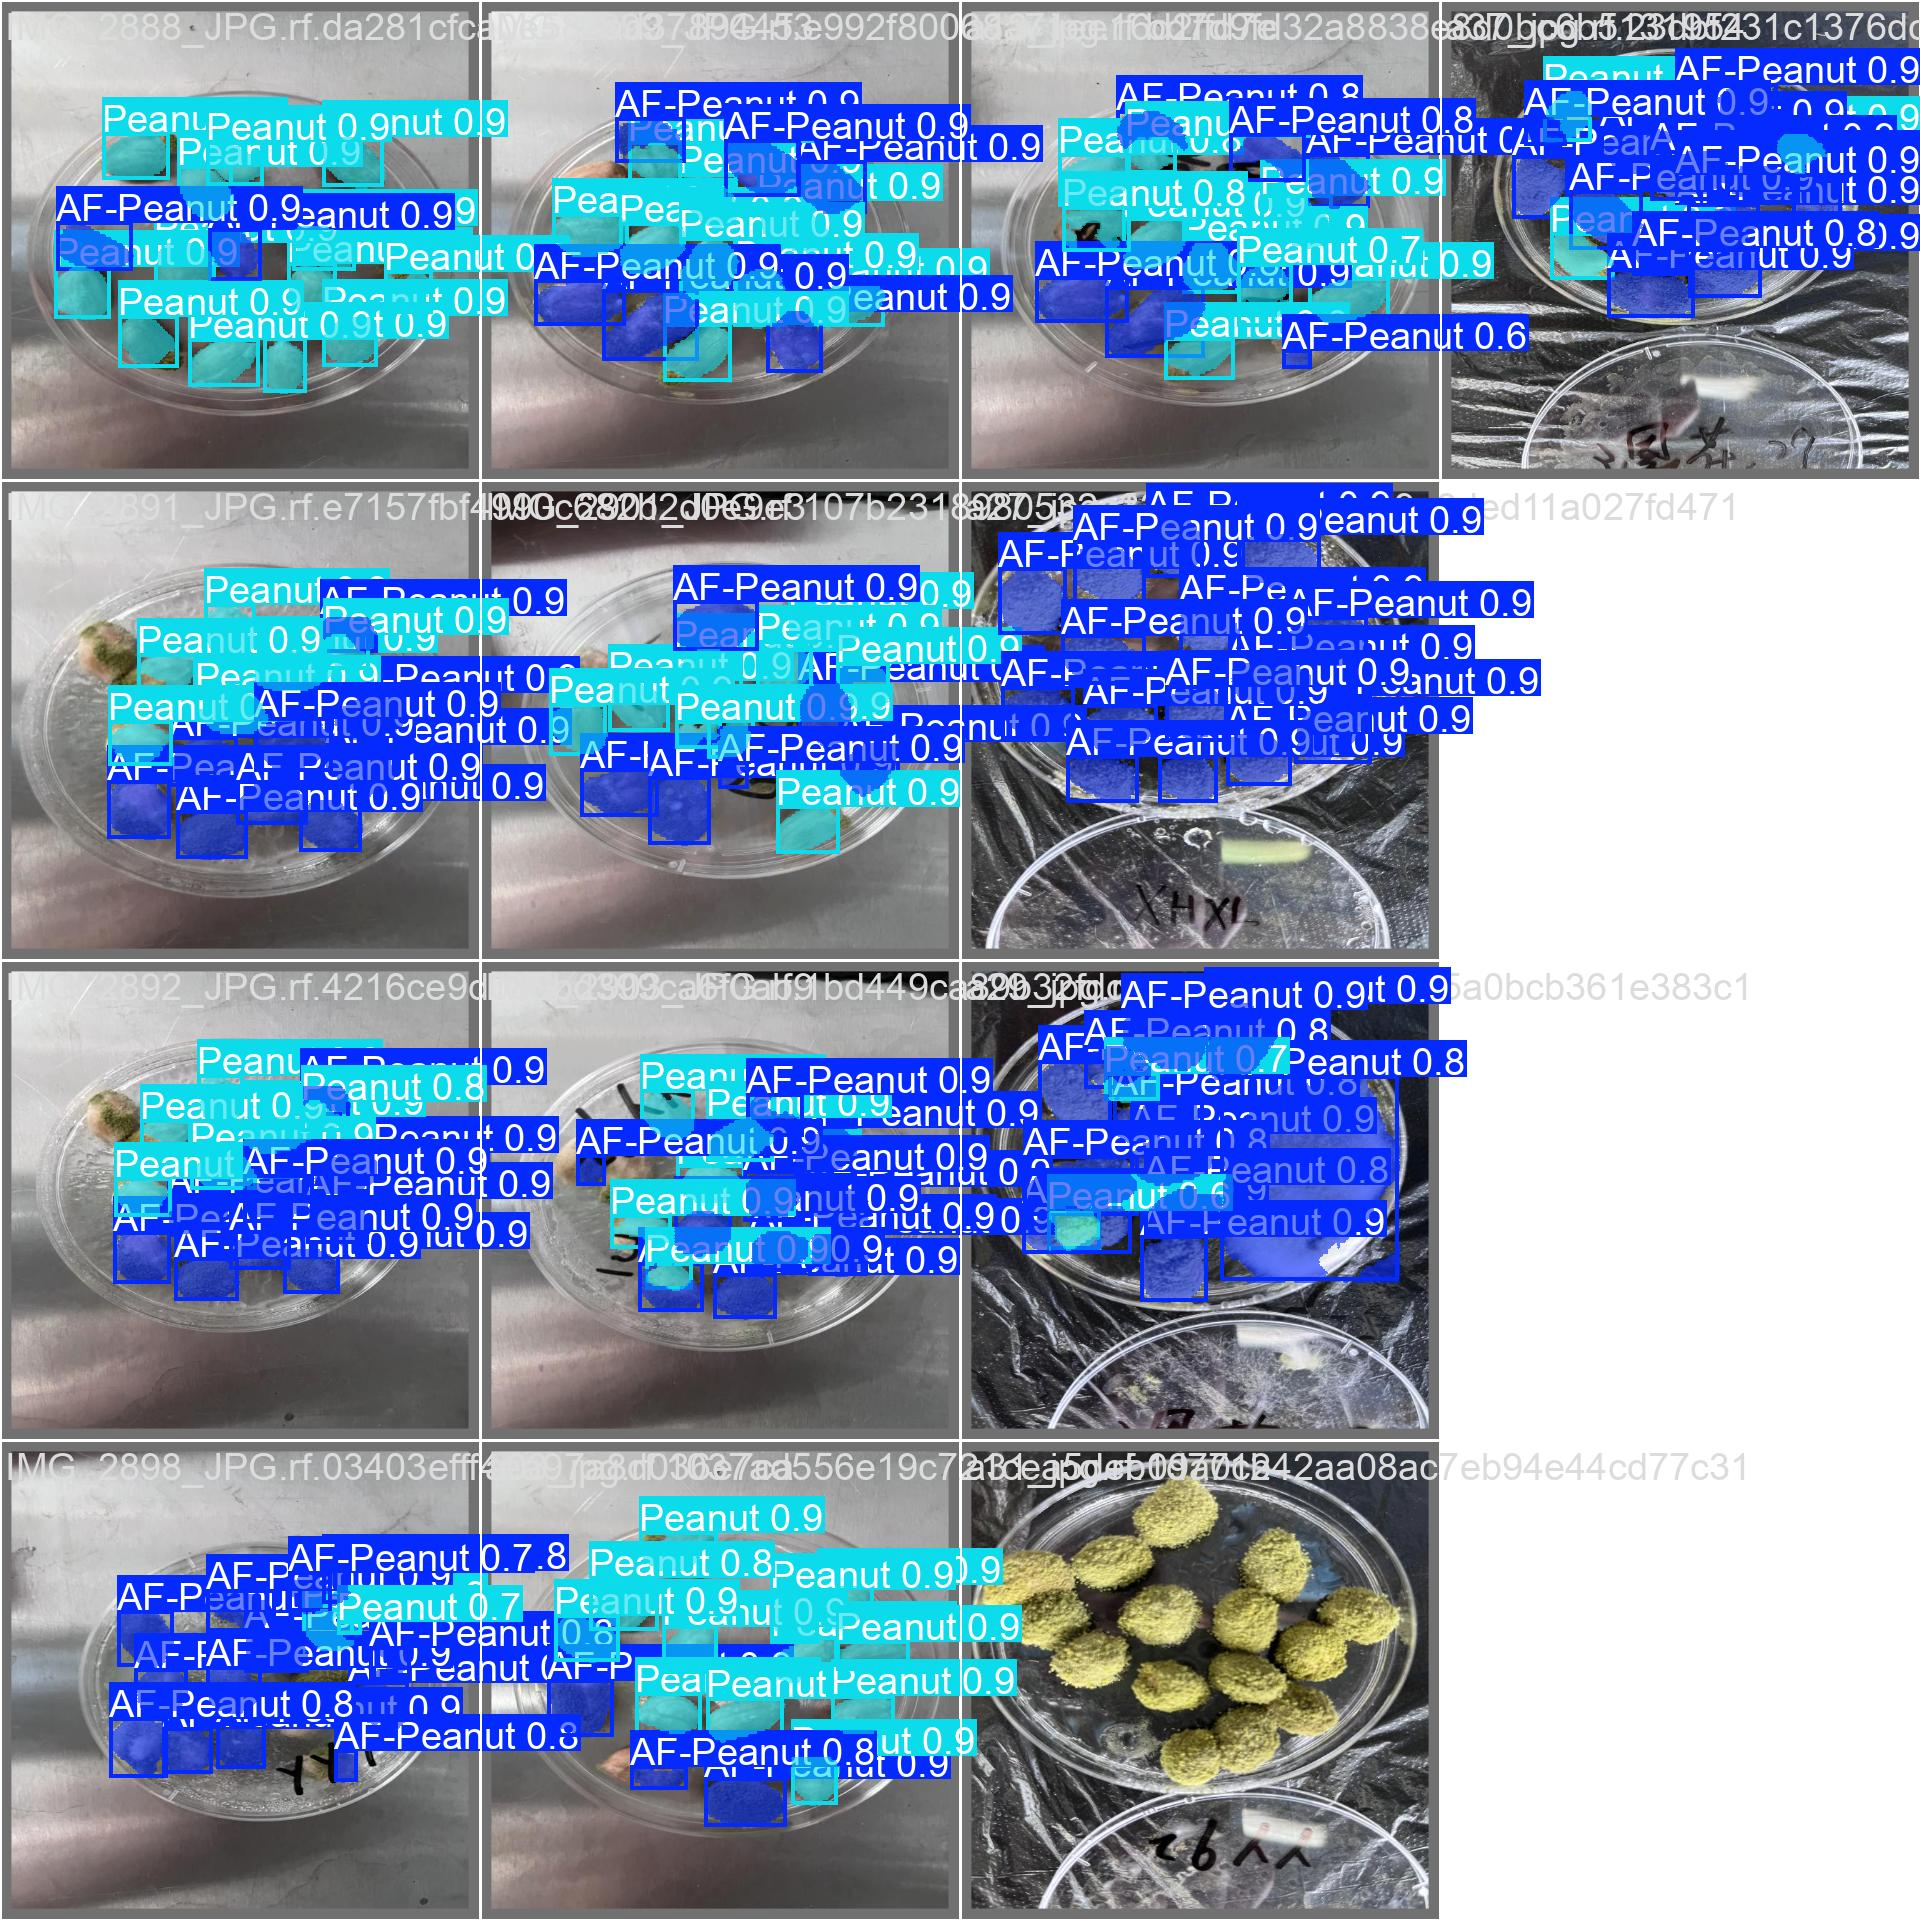

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,590 parameters, 0 gradients, 35.3 GFLOPs
val: Scanning /content/datasets/Peanuts-AF-segmentation-6/valid/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100% 13/13 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.05s/it]
                   all         13        243      0.856       0.76      0.841      0.721      0.808      0.797      0.826       0.67
             AF-Peanut         13        154       0.91      0.701      0.815      0.717      0.832      0.742        0.8      0.682
                Peanut         11         89      0.802      0.818      0.866      0.725      0.783      0.85

In [ ]:
!yolo task=detect mode=predict model=/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

## Inference with custom model

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,590 parameters, 0 gradients, 35.3 GFLOPs

image 1/6 /content/datasets/Peanuts-AF-segmentation-6/test/images/IMG_2900_JPG.rf.127487801e338e1b9457caa272a6e053.jpg: 640x640 9 AF-Peanuts, 16 Peanuts, 23.6ms
image 2/6 /content/datasets/Peanuts-AF-segmentation-6/test/images/IMG_2905_JPG.rf.480f0ce2b384e05b3592b40ccc9d10a7.jpg: 640x640 13 AF-Peanuts, 5 Peanuts, 20.3ms
image 3/6 /content/datasets/Peanuts-AF-segmentation-6/test/images/IMG_2906_JPG.rf.00a597c0bd3c8db97e0406c5a04063ca.jpg: 640x640 5 AF-Peanuts, 13 Peanuts, 20.2ms
image 4/6 /content/datasets/Peanuts-AF-segmentation-6/test/images/a02_jpg.rf.a64abf782df4707e64a2dffad87a16ec.jpg: 640x640 13 AF-Peanuts, 6 Peanuts, 20.8ms
image 5/6 /content/datasets/Peanuts-AF-segmentat

**NOTE:** Let's take a look at few results.

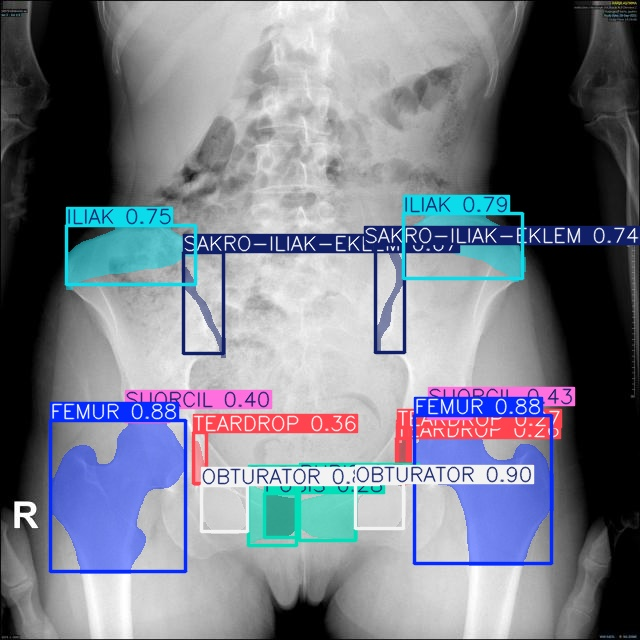

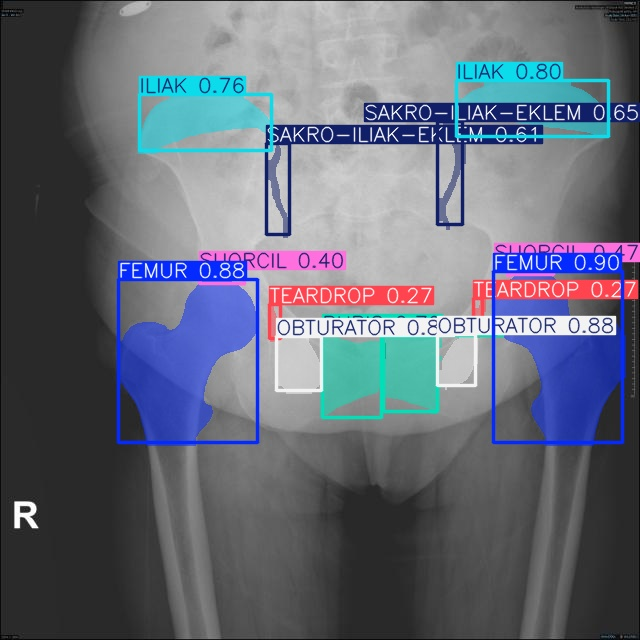

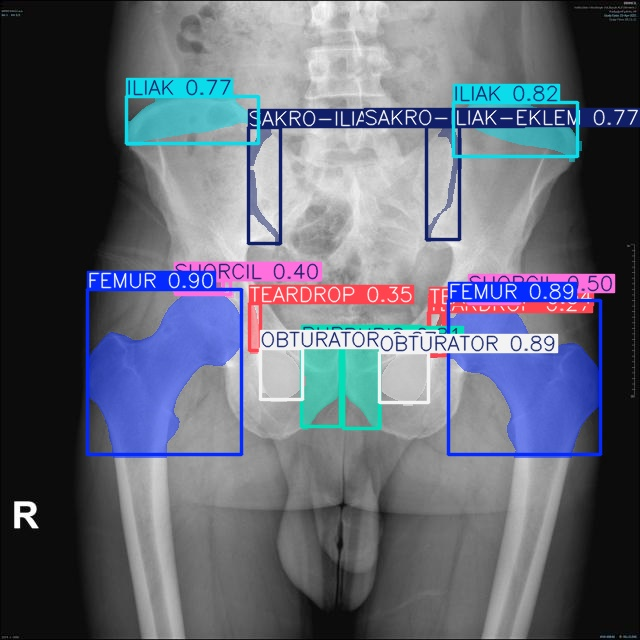

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/segment/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv11 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/segment/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv11 weights.

# Post processing for My task ✈



image 1/1 /content/datasets/Peanuts-AF-segmentation-6/train/images/IMG_2890_JPG.rf.fcc3ba046ca9e1eb75adaa56aae5f907.jpg: 640x640 7 AF-Peanuts, 15 Peanuts, 2189.4ms
Speed: 33.9ms preprocess, 2189.4ms inference, 262.4ms postprocess per image at shape (1, 3, 640, 640)


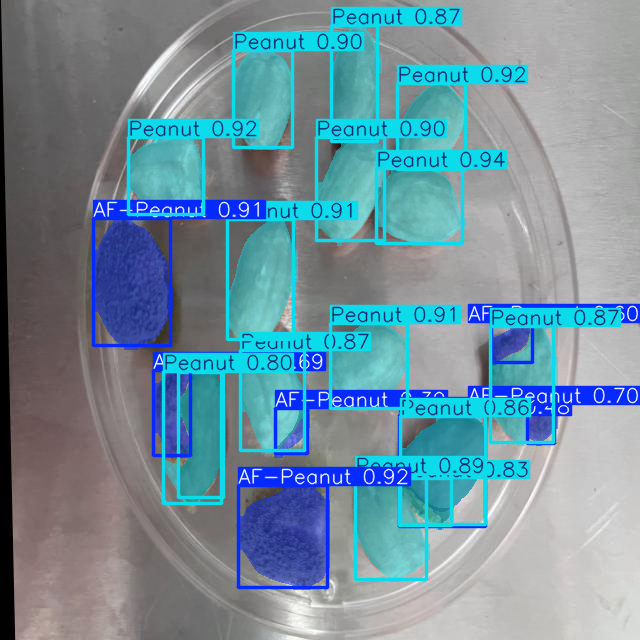

In [10]:
import cv2
import numpy as np
from PIL import Image
from ultralytics import YOLO
# Assuming 'segmentation_output' is the model's predicted mask
# Classes: 0 = background, 1 = moldy, 2 = unmoldy

image_path = "/content/datasets/Peanuts-AF-segmentation-6/train/images/IMG_2890_JPG.rf.fcc3ba046ca9e1eb75adaa56aae5f907.jpg"
model = YOLO(f"/content/gdrive/MyDrive/Peanut_AF/train/train/weights/best.pt")

image = Image.open(image_path)

results = model.predict(source=image_path)

# Iterate over results (list) and show each prediction
for result in results:
    result.show()  # This will show the segmented image

    # Access segmentation masks (if needed)
    segmentation_output = result.masks




image 1/1 /content/datasets/Peanuts-AF-segmentation-6/train/images/IMG_2890_JPG.rf.fcc3ba046ca9e1eb75adaa56aae5f907.jpg: 640x640 7 AF-Peanuts, 15 Peanuts, 762.6ms
Speed: 3.1ms preprocess, 762.6ms inference, 114.9ms postprocess per image at shape (1, 3, 640, 640)
Number of distinct peanuts: 11
Number of AF-Peanuts (moldy): 6
Number of Peanuts (unmoldy): 5
Peanut 1: Mold coverage = 0.00%
Peanut 2: Mold coverage = 0.00%
Peanut 3: Mold coverage = 0.00%
Peanut 4: Mold coverage = 100.00%
Peanut 5: Mold coverage = 0.00%
Peanut 6: Mold coverage = 0.00%
Peanut 7: Mold coverage = 28.37%
Peanut 8: Mold coverage = 12.33%
Peanut 9: Mold coverage = 32.73%
Peanut 10: Mold coverage = 50.14%
Peanut 11: Mold coverage = 100.00%


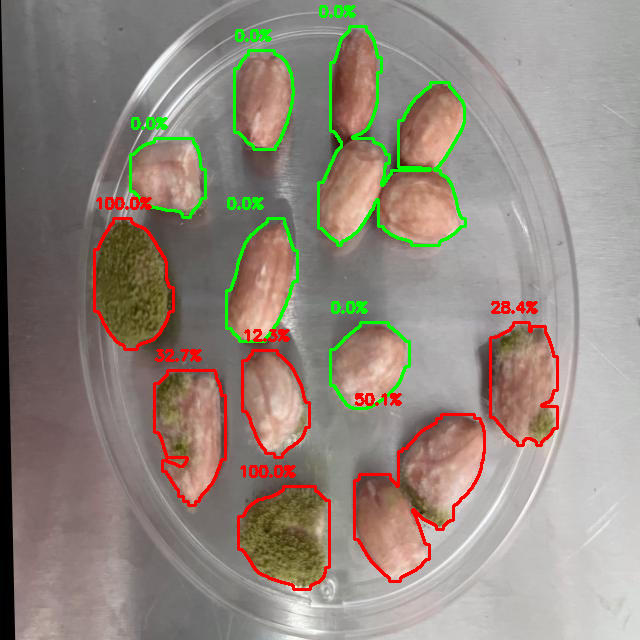

error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:1367: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [25]:
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Define paths
image_path = "/content/datasets/Peanuts-AF-segmentation-6/train/images/IMG_2890_JPG.rf.fcc3ba046ca9e1eb75adaa56aae5f907.jpg"
model_path = "/content/gdrive/MyDrive/Peanut_AF/train/train/weights/best.pt"

# Load the YOLO model
model = YOLO(model_path)

# Load the image
original_image = cv2.imread(image_path)
image = Image.open(image_path)

# Perform inference
results = model.predict(source=image_path)

# Process results
for result in results:
    if hasattr(result, 'masks') and result.masks is not None:
        # Extract segmentation masks and class labels
        segmentation_masks = result.masks.data.cpu().numpy()  # Masks as NumPy array
        classes = result.boxes.cls.cpu().numpy()  # Class indices for each instance

        # Separate binary masks for AF-Peanut and Peanut
        af_peanut_mask = np.zeros_like(segmentation_masks[0], dtype=np.uint8)
        peanut_mask = np.zeros_like(segmentation_masks[0], dtype=np.uint8)

        for mask, cls in zip(segmentation_masks, classes):
            if cls == 0:  # AF-Peanut
                af_peanut_mask = np.logical_or(af_peanut_mask, mask).astype(np.uint8)
            elif cls == 1:  # Peanut
                peanut_mask = np.logical_or(peanut_mask, mask).astype(np.uint8)

        # Combine both masks to identify distinct peanuts
        combined_mask = np.logical_or(af_peanut_mask, peanut_mask).astype(np.uint8)

        # Perform connected components analysis
        num_labels, labels = cv2.connectedComponents(combined_mask)

        af_peanut_count = 0
        peanut_count = 0
        percentages = []  # To store mold percentage for each peanut

        # Copy image for visualization
        vis_image = original_image.copy()

        for i in range(1, num_labels):  # Start from 1 to skip the background
            # Extract individual peanut mask
            individual_peanut_mask = (labels == i).astype(np.uint8)

            # Calculate overlap with AF-Peanut mask
            af_area = np.sum(np.logical_and(individual_peanut_mask, af_peanut_mask))
            total_area = np.sum(individual_peanut_mask)

            if total_area > 0:
                mold_percentage = (af_area / total_area) * 100
                percentages.append(mold_percentage)

                if af_area > 0:
                    af_peanut_count += 1
                    color = (0, 0, 255)  # Red for AF-Peanut (moldy)
                else:
                    peanut_count += 1
                    color = (0, 255, 0)  # Green for Peanut (unmoldy)

                # Visualize the peanut mask
                contours, _ = cv2.findContours(individual_peanut_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                cv2.drawContours(vis_image, contours, -1, color, 2)

                # Add mold percentage text
                x, y, w, h = cv2.boundingRect(contours[0])
                text = f"{mold_percentage:.1f}%"
                cv2.putText(vis_image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        print(f"Number of distinct peanuts: {num_labels - 1}")
        print(f"Number of AF-Peanuts (moldy): {af_peanut_count}")
        print(f"Number of Peanuts (unmoldy): {peanut_count}")

        for idx, percentage in enumerate(percentages, start=1):
            print(f"Peanut {idx}: Mold coverage = {percentage:.2f}%")

        # Show the visualization
        cv2_imshow(vis_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("No segmentation masks found in the result.")



image 1/1 /content/datasets/Peanuts-AF-segmentation-6/train/images/IMG_2890_JPG.rf.fcc3ba046ca9e1eb75adaa56aae5f907.jpg: 640x640 7 AF-Peanuts, 15 Peanuts, 912.0ms
Speed: 4.7ms preprocess, 912.0ms inference, 120.2ms postprocess per image at shape (1, 3, 640, 640)
Number of distinct peanuts: 11
Number of AF-Peanuts (moldy): 6
Number of Peanuts (unmoldy): 5
Peanut 1: Mold coverage = 0.00%
Peanut 2: Mold coverage = 0.00%
Peanut 3: Mold coverage = 0.00%
Peanut 4: Mold coverage = 100.00%
Peanut 5: Mold coverage = 0.00%
Peanut 6: Mold coverage = 0.00%
Peanut 7: Mold coverage = 28.37%
Peanut 8: Mold coverage = 12.33%
Peanut 9: Mold coverage = 32.73%
Peanut 10: Mold coverage = 50.14%
Peanut 11: Mold coverage = 100.00%


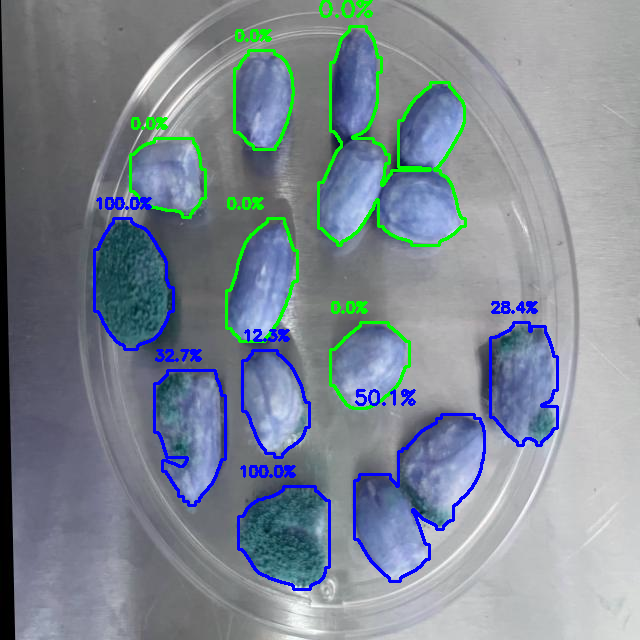

In [26]:
import cv2
import numpy as np
from PIL import Image
from ultralytics import YOLO
from google.colab.patches import cv2_imshow  # Correctly import cv2_imshow

# Define paths
image_path = "/content/datasets/Peanuts-AF-segmentation-6/train/images/IMG_2890_JPG.rf.fcc3ba046ca9e1eb75adaa56aae5f907.jpg"
model_path = "/content/gdrive/MyDrive/Peanut_AF/train/train/weights/best.pt"

# Load the YOLO model
model = YOLO(model_path)

# Load the image using OpenCV for visualization
original_image = cv2.imread(image_path)

# Perform inference
results = model.predict(source=image_path)

# Process results
for result in results:
    if hasattr(result, 'masks') and result.masks is not None:
        # Extract segmentation masks and class labels
        segmentation_masks = result.masks.data.cpu().numpy()  # Masks as NumPy array
        classes = result.boxes.cls.cpu().numpy()  # Class indices for each instance

        # Separate binary masks for AF-Peanut and Peanut
        af_peanut_mask = np.zeros(segmentation_masks.shape[1:], dtype=np.uint8)
        peanut_mask = np.zeros(segmentation_masks.shape[1:], dtype=np.uint8)

        for mask, cls in zip(segmentation_masks, classes):
            if cls == 0:  # AF-Peanut
                af_peanut_mask = np.logical_or(af_peanut_mask, mask).astype(np.uint8)
            elif cls == 1:  # Peanut
                peanut_mask = np.logical_or(peanut_mask, mask).astype(np.uint8)

        # Combine both masks to identify distinct peanuts
        combined_mask = np.logical_or(af_peanut_mask, peanut_mask).astype(np.uint8)

        # Perform connected components analysis
        num_labels, labels = cv2.connectedComponents(combined_mask)

        af_peanut_count = 0
        peanut_count = 0
        percentages = []  # To store mold percentage for each peanut

        # Copy image for visualization
        vis_image = original_image.copy()

        for i in range(1, num_labels):  # Start from 1 to skip the background
            # Extract individual peanut mask
            individual_peanut_mask = (labels == i).astype(np.uint8)

            # Calculate overlap with AF-Peanut mask
            af_area = np.sum(np.logical_and(individual_peanut_mask, af_peanut_mask))
            total_area = np.sum(individual_peanut_mask)

            if total_area > 0:
                mold_percentage = (af_area / total_area) * 100
                percentages.append(mold_percentage)

                if af_area > 0:
                    af_peanut_count += 1
                    color = (0, 0, 255)  # Red for AF-Peanut (moldy)
                else:
                    peanut_count += 1
                    color = (0, 255, 0)  # Green for Peanut (unmoldy)

                # Visualize the peanut mask
                contours, _ = cv2.findContours(individual_peanut_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                cv2.drawContours(vis_image, contours, -1, color, 2)

                # Add mold percentage text
                if contours:
                    x, y, w, h = cv2.boundingRect(contours[0])
                    text = f"{mold_percentage:.1f}%"
                    # Choose font scale based on image size
                    font_scale = max(0.5, min(w, h) / 200)
                    cv2.putText(vis_image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, font_scale, color, 2)

        print(f"Number of distinct peanuts: {num_labels - 1}")
        print(f"Number of AF-Peanuts (moldy): {af_peanut_count}")
        print(f"Number of Peanuts (unmoldy): {peanut_count}")

        for idx, percentage in enumerate(percentages, start=1):
            print(f"Peanut {idx}: Mold coverage = {percentage:.2f}%")

        # Show the visualization in Colab
        # Convert BGR (OpenCV) to RGB for correct color display in Colab
        vis_image_rgb = cv2.cvtColor(vis_image, cv2.COLOR_BGR2RGB)
        cv2_imshow(vis_image_rgb)  # Display the processed image
    else:
        print("No segmentation masks found in the result.")


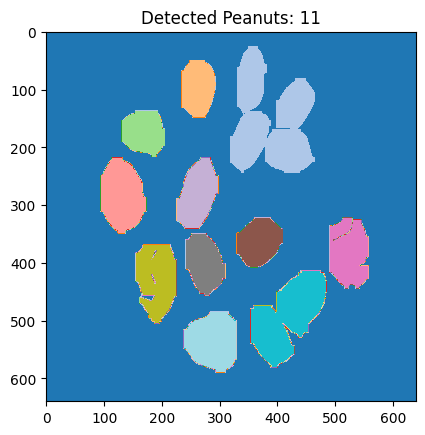

In [14]:
from IPython.display import Image as IPyImage
import matplotlib.pyplot as plt
from scipy.ndimage import label

# Create a labeled mask from the multi-mask result
labeled_mask, num_peanuts = label(mask_array.sum(axis=0))  # Sum all masks along axis 0 and label connected components

# Show the labeled mask with distinct colors for each instance
plt.imshow(labeled_mask, cmap='tab20')  # Use 'tab20' for distinct colors
plt.title(f"Detected Peanuts: {num_peanuts}")
plt.show()


image 1/1 /content/datasets/Peanuts-AF-segmentation-6/train/images/IMG_2890_JPG.rf.fcc3ba046ca9e1eb75adaa56aae5f907.jpg: 640x640 7 AF-Peanuts, 15 Peanuts, 883.2ms
Speed: 3.4ms preprocess, 883.2ms inference, 112.1ms postprocess per image at shape (1, 3, 640, 640)


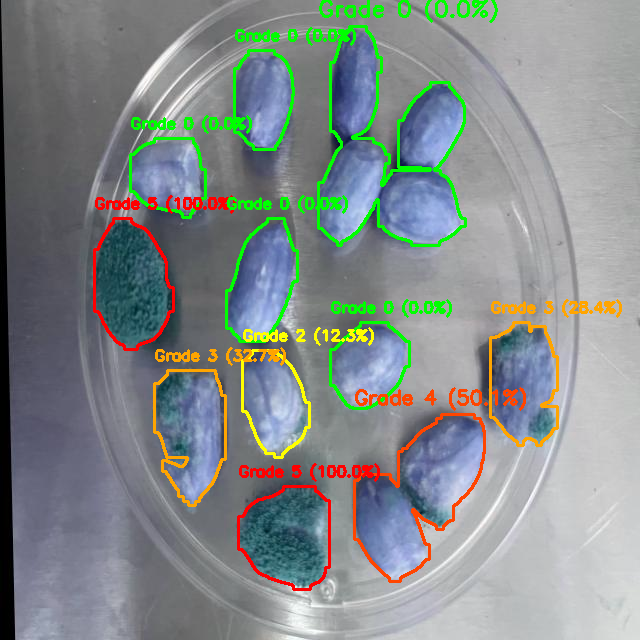

In [27]:
import cv2
import numpy as np
from PIL import Image
from ultralytics import YOLO
from google.colab.patches import cv2_imshow  # Import for visualization in Colab

# Define paths
image_path = "/content/datasets/Peanuts-AF-segmentation-6/train/images/IMG_2890_JPG.rf.fcc3ba046ca9e1eb75adaa56aae5f907.jpg"
model_path = "/content/gdrive/MyDrive/Peanut_AF/train/train/weights/best.pt"

# Load the YOLO model
model = YOLO(model_path)

# Load the image using OpenCV for visualization
original_image = cv2.imread(image_path)

# Perform inference
results = model.predict(source=image_path)

# Define mold grades and their thresholds
grades = {
    0: (0, 0, "Grade 0"),  # 0%
    1: (0.01, 10, "Grade 1"),  # 0–10%
    2: (10.01, 20, "Grade 2"),  # 10–20%
    3: (20.01, 50, "Grade 3"),  # 20–50%
    4: (50.01, 80, "Grade 4"),  # 50–80%
    5: (80.01, 100, "Grade 5")  # 80–100%
}

# Define a colormap for gradual shades
colormap = {
    0: (0, 255, 0),  # Green for Grade 0
    1: (173, 255, 47),  # Light green for Grade 1
    2: (255, 255, 0),  # Yellow for Grade 2
    3: (255, 165, 0),  # Orange for Grade 3
    4: (255, 69, 0),  # Red-orange for Grade 4
    5: (255, 0, 0)  # Red for Grade 5
}

# Process results
for result in results:
    if hasattr(result, 'masks') and result.masks is not None:
        # Extract segmentation masks and class labels
        segmentation_masks = result.masks.data.cpu().numpy()  # Masks as NumPy array
        classes = result.boxes.cls.cpu().numpy()  # Class indices for each instance

        # Separate binary masks for AF-Peanut and Peanut
        af_peanut_mask = np.zeros(segmentation_masks.shape[1:], dtype=np.uint8)
        peanut_mask = np.zeros(segmentation_masks.shape[1:], dtype=np.uint8)

        for mask, cls in zip(segmentation_masks, classes):
            if cls == 0:  # AF-Peanut
                af_peanut_mask = np.logical_or(af_peanut_mask, mask).astype(np.uint8)
            elif cls == 1:  # Peanut
                peanut_mask = np.logical_or(peanut_mask, mask).astype(np.uint8)

        # Combine both masks to identify distinct peanuts
        combined_mask = np.logical_or(af_peanut_mask, peanut_mask).astype(np.uint8)

        # Perform connected components analysis
        num_labels, labels = cv2.connectedComponents(combined_mask)

        # Copy image for visualization
        vis_image = original_image.copy()

        for i in range(1, num_labels):  # Start from 1 to skip the background
            # Extract individual peanut mask
            individual_peanut_mask = (labels == i).astype(np.uint8)

            # Calculate overlap with AF-Peanut mask
            af_area = np.sum(np.logical_and(individual_peanut_mask, af_peanut_mask))
            total_area = np.sum(individual_peanut_mask)

            if total_area > 0:
                mold_percentage = (af_area / total_area) * 100

                # Determine grade and color
                for grade, (low, high, label) in grades.items():
                    if low <= mold_percentage <= high:
                        grade_label = label
                        color = colormap[grade]
                        break

                # Visualize the peanut mask
                contours, _ = cv2.findContours(individual_peanut_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                cv2.drawContours(vis_image, contours, -1, color, 2)

                # Add grade and mold percentage text
                if contours:
                    x, y, w, h = cv2.boundingRect(contours[0])
                    text = f"{grade_label} ({mold_percentage:.1f}%)"
                    # Dynamic font scaling
                    font_scale = max(0.5, min(w, h) / 200)
                    cv2.putText(vis_image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, font_scale, color, 2)

        # Show the visualization in Colab
        # Convert BGR (OpenCV) to RGB for correct color display in Colab
        vis_image_rgb = cv2.cvtColor(vis_image, cv2.COLOR_BGR2RGB)
        cv2_imshow(vis_image_rgb)  # Display the processed image
    else:
        print("No segmentation masks found in the result.")



image 1/1 /content/datasets/Peanuts-AF-segmentation-6/train/images/IMG_2890_JPG.rf.fcc3ba046ca9e1eb75adaa56aae5f907.jpg: 640x640 7 AF-Peanuts, 15 Peanuts, 833.3ms
Speed: 5.2ms preprocess, 833.3ms inference, 126.9ms postprocess per image at shape (1, 3, 640, 640)


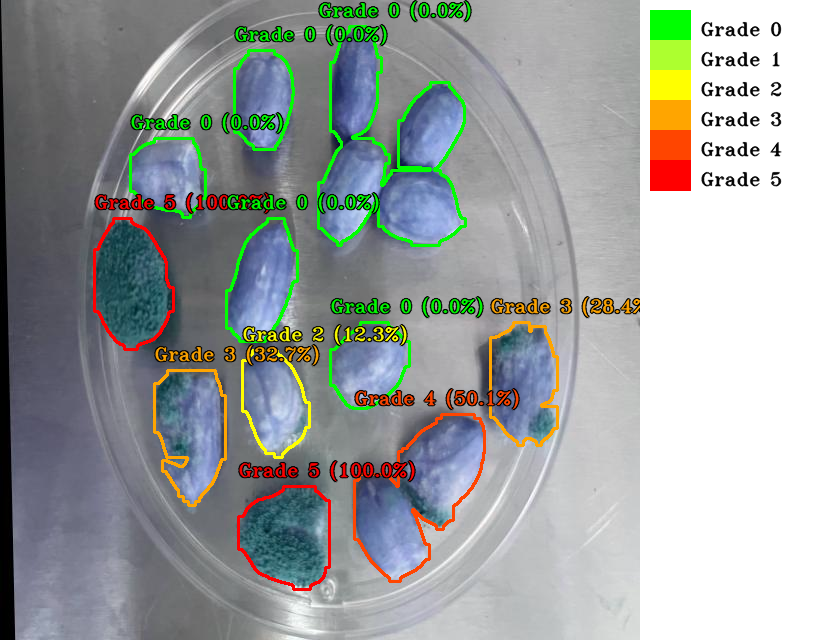

In [29]:
import cv2
import numpy as np
from PIL import Image
from ultralytics import YOLO
from google.colab.patches import cv2_imshow  # For Colab visualization

# Define paths
image_path = "/content/datasets/Peanuts-AF-segmentation-6/train/images/IMG_2890_JPG.rf.fcc3ba046ca9e1eb75adaa56aae5f907.jpg"
model_path = "/content/gdrive/MyDrive/Peanut_AF/train/train/weights/best.pt"

# Load the YOLO model
model = YOLO(model_path)

# Load the image using OpenCV
original_image = cv2.imread(image_path)

# Perform inference
results = model.predict(source=image_path)

# Define mold grades and thresholds
grades = {
    0: (0, 0, "Grade 0"),       # 0%
    1: (0.01, 10, "Grade 1"),   # 0–10%
    2: (10.01, 20, "Grade 2"),  # 10–20%
    3: (20.01, 50, "Grade 3"),  # 20–50%
    4: (50.01, 80, "Grade 4"),  # 50–80%
    5: (80.01, 100, "Grade 5")  # 80–100%
}

# Colormap for grades
colormap = {
    0: (0, 255, 0),       # Green for Grade 0
    1: (173, 255, 47),    # Light green for Grade 1
    2: (255, 255, 0),     # Yellow for Grade 2
    3: (255, 165, 0),     # Orange for Grade 3
    4: (255, 69, 0),      # Red-orange for Grade 4
    5: (255, 0, 0)        # Red for Grade 5
}

# Define uniform font settings
font = cv2.FONT_HERSHEY_TRIPLEX  # Close to Times New Roman in OpenCV
font_scale = 0.6
font_thickness = 1

# Process results
for result in results:
    if hasattr(result, 'masks') and result.masks is not None:
        # Extract segmentation masks and class labels
        segmentation_masks = result.masks.data.cpu().numpy()  # Masks as NumPy array
        classes = result.boxes.cls.cpu().numpy()  # Class indices for each instance

        # Separate binary masks for AF-Peanut and Peanut
        af_peanut_mask = np.zeros(segmentation_masks.shape[1:], dtype=np.uint8)
        peanut_mask = np.zeros(segmentation_masks.shape[1:], dtype=np.uint8)

        for mask, cls in zip(segmentation_masks, classes):
            if cls == 0:  # AF-Peanut
                af_peanut_mask = np.logical_or(af_peanut_mask, mask).astype(np.uint8)
            elif cls == 1:  # Peanut
                peanut_mask = np.logical_or(peanut_mask, mask).astype(np.uint8)

        # Combine both masks to identify distinct peanuts
        combined_mask = np.logical_or(af_peanut_mask, peanut_mask).astype(np.uint8)

        # Perform connected components analysis
        num_labels, labels = cv2.connectedComponents(combined_mask)

        # Copy image for visualization
        vis_image = original_image.copy()

        for i in range(1, num_labels):  # Skip background (label 0)
            individual_peanut_mask = (labels == i).astype(np.uint8)

            # Calculate mold percentage
            af_area = np.sum(np.logical_and(individual_peanut_mask, af_peanut_mask))
            total_area = np.sum(individual_peanut_mask)

            if total_area > 0:
                mold_percentage = (af_area / total_area) * 100

                # Determine grade and color
                for grade, (low, high, label) in grades.items():
                    if low <= mold_percentage <= high:
                        grade_label = label
                        color = colormap[grade]
                        break

                # Visualize peanut mask with contours
                contours, _ = cv2.findContours(individual_peanut_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                cv2.drawContours(vis_image, contours, -1, color, 2)

                # Add grade and percentage text
                if contours:
                    x, y, w, h = cv2.boundingRect(contours[0])
                    text = f"{grade_label} ({mold_percentage:.1f}%)"
                    cv2.putText(vis_image, text, (x, y - 10), font, font_scale, (0, 0, 0), font_thickness + 1, cv2.LINE_AA)  # Shadow
                    cv2.putText(vis_image, text, (x, y - 10), font, font_scale, color, font_thickness, cv2.LINE_AA)

        # Add colormap legend beside the image
        legend_height = vis_image.shape[0]  # Match the height of the main image
        legend_width = 200
        legend = np.ones((legend_height, legend_width, 3), dtype=np.uint8) * 255  # White background

        # Populate the legend with the colormap and grade labels
        for i, (grade, color) in enumerate(colormap.items()):
            y_start = 10 + i * 30
            y_end = y_start + 30
            cv2.rectangle(legend, (10, y_start), (50, y_end), color, -1)
            text = grades[grade][2]
            cv2.putText(legend, text, (60, y_end - 5), font, 0.6, (0, 0, 0), 1, cv2.LINE_AA)

        # Combine the main image and the legend horizontally
        combined = np.hstack([vis_image, legend])

        # Display the visualization in Colab
        combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)
        cv2_imshow(combined_rgb)


    else:
        print("No segmentation masks found in the result.")



image 1/1 /content/datasets/Peanuts-AF-segmentation-6/train/images/IMG_2890_JPG.rf.fcc3ba046ca9e1eb75adaa56aae5f907.jpg: 640x640 7 AF-Peanuts, 15 Peanuts, 1689.0ms
Speed: 7.6ms preprocess, 1689.0ms inference, 159.7ms postprocess per image at shape (1, 3, 640, 640)


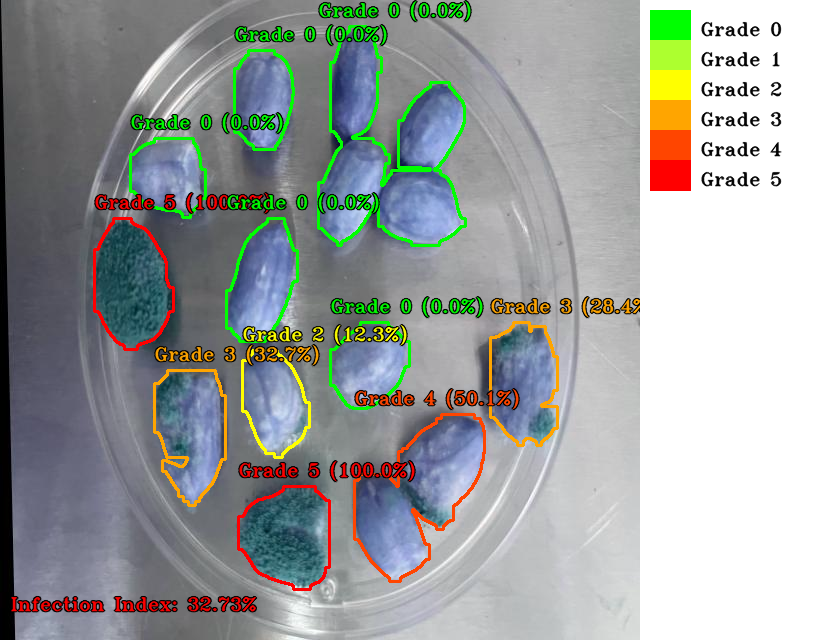

In [30]:
import cv2
import numpy as np
from PIL import Image
from ultralytics import YOLO
from google.colab.patches import cv2_imshow  # For Colab visualization

# Define paths
image_path = "/content/datasets/Peanuts-AF-segmentation-6/train/images/IMG_2890_JPG.rf.fcc3ba046ca9e1eb75adaa56aae5f907.jpg"
model_path = "/content/gdrive/MyDrive/Peanut_AF/train/train/weights/best.pt"

# Load the YOLO model
model = YOLO(model_path)

# Load the image using OpenCV
original_image = cv2.imread(image_path)

# Perform inference
results = model.predict(source=image_path)

# Define mold grades and thresholds
grades = {
    0: (0, 0, "Grade 0"),       # 0%
    1: (0.01, 10, "Grade 1"),   # 0–10%
    2: (10.01, 20, "Grade 2"),  # 10–20%
    3: (20.01, 50, "Grade 3"),  # 20–50%
    4: (50.01, 80, "Grade 4"),  # 50–80%
    5: (80.01, 100, "Grade 5")  # 80–100%
}

# Colormap for grades
colormap = {
    0: (0, 255, 0),       # Green for Grade 0
    1: (173, 255, 47),    # Light green for Grade 1
    2: (255, 255, 0),     # Yellow for Grade 2
    3: (255, 165, 0),     # Orange for Grade 3
    4: (255, 69, 0),      # Red-orange for Grade 4
    5: (255, 0, 0)        # Red for Grade 5
}

# Define uniform font settings
font = cv2.FONT_HERSHEY_TRIPLEX  # Close to Times New Roman in OpenCV
font_scale = 0.6
font_thickness = 1

# Initialize counters for each grade
grade_counts = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}

# Process results
for result in results:
    if hasattr(result, 'masks') and result.masks is not None:
        # Extract segmentation masks and class labels
        segmentation_masks = result.masks.data.cpu().numpy()  # Masks as NumPy array
        classes = result.boxes.cls.cpu().numpy()  # Class indices for each instance

        # Separate binary masks for AF-Peanut and Peanut
        af_peanut_mask = np.zeros(segmentation_masks.shape[1:], dtype=np.uint8)
        peanut_mask = np.zeros(segmentation_masks.shape[1:], dtype=np.uint8)

        for mask, cls in zip(segmentation_masks, classes):
            if cls == 0:  # AF-Peanut
                af_peanut_mask = np.logical_or(af_peanut_mask, mask).astype(np.uint8)
            elif cls == 1:  # Peanut
                peanut_mask = np.logical_or(peanut_mask, mask).astype(np.uint8)

        # Combine both masks to identify distinct peanuts
        combined_mask = np.logical_or(af_peanut_mask, peanut_mask).astype(np.uint8)

        # Perform connected components analysis
        num_labels, labels = cv2.connectedComponents(combined_mask)

        # Copy image for visualization
        vis_image = original_image.copy()

        for i in range(1, num_labels):  # Skip background (label 0)
            individual_peanut_mask = (labels == i).astype(np.uint8)

            # Calculate mold percentage
            af_area = np.sum(np.logical_and(individual_peanut_mask, af_peanut_mask))
            total_area = np.sum(individual_peanut_mask)

            if total_area > 0:
                mold_percentage = (af_area / total_area) * 100

                # Determine grade and color
                for grade, (low, high, label) in grades.items():
                    if low <= mold_percentage <= high:
                        grade_label = label
                        color = colormap[grade]
                        grade_counts[grade] += 1  # Increment the count for this grade
                        break

                # Visualize peanut mask with contours
                contours, _ = cv2.findContours(individual_peanut_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                cv2.drawContours(vis_image, contours, -1, color, 2)

                # Add grade and percentage text
                if contours:
                    x, y, w, h = cv2.boundingRect(contours[0])
                    text = f"{grade_label} ({mold_percentage:.1f}%)"
                    cv2.putText(vis_image, text, (x, y - 10), font, font_scale, (0, 0, 0), font_thickness + 1, cv2.LINE_AA)  # Shadow
                    cv2.putText(vis_image, text, (x, y - 10), font, font_scale, color, font_thickness, cv2.LINE_AA)

        # Calculate Infection Index
        N = sum(grade_counts.values())  # Total number of peanuts
        if N > 0:
            infection_index = (0.1 * grade_counts[0] + 0.2 * grade_counts[1] + 0.5 * grade_counts[2] +
                               0.8 * grade_counts[3] + 1 * grade_counts[4]) / N * 100
            infection_text = f"Infection Index: {infection_index:.2f}%"

            # Display Infection Index on the image
            cv2.putText(vis_image, infection_text, (10, vis_image.shape[0] - 30), font, font_scale, (0, 0, 0), font_thickness + 1, cv2.LINE_AA)  # Shadow
            cv2.putText(vis_image, infection_text, (10, vis_image.shape[0] - 30), font, font_scale, (255, 0, 0), font_thickness, cv2.LINE_AA)

        # Add colormap legend beside the image
        legend_height = vis_image.shape[0]  # Match the height of the main image
        legend_width = 200
        legend = np.ones((legend_height, legend_width, 3), dtype=np.uint8) * 255  # White background

        # Populate the legend with the colormap and grade labels
        for i, (grade, color) in enumerate(colormap.items()):
            y_start = 10 + i * 30
            y_end = y_start + 30
            cv2.rectangle(legend, (10, y_start), (50, y_end), color, -1)
            text = grades[grade][2]
            cv2.putText(legend, text, (60, y_end - 5), font, 0.6, (0, 0, 0), 1, cv2.LINE_AA)

        # Combine the main image and the legend horizontally
        combined = np.hstack([vis_image, legend])

        # Display the visualization in Colab
        combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)
        cv2_imshow(combined_rgb)
    else:
        print("No segmentation masks found in the result.")


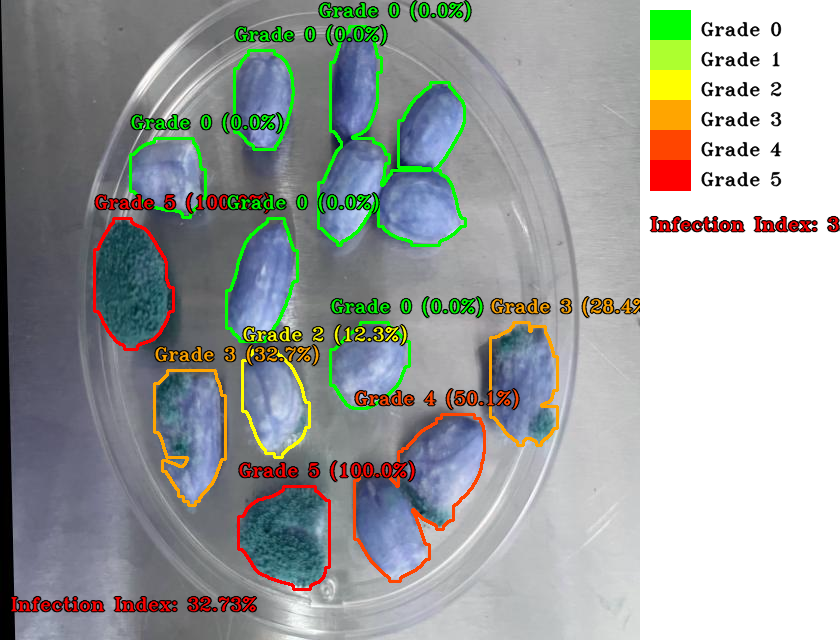

In [31]:
# Add Infection Index and Colormap together on the right side
legend_height = vis_image.shape[0]  # Match the height of the main image
legend_width = 200  # Define the width for the legend and index section
legend = np.ones((legend_height, legend_width, 3), dtype=np.uint8) * 255  # White background

# Populate the legend with the colormap and grade labels
y_offset = 10  # Start Y-position for the legend
for i, (grade, color) in enumerate(colormap.items()):
    y_start = y_offset + i * 30
    y_end = y_start + 30
    cv2.rectangle(legend, (10, y_start), (50, y_end), color, -1)
    text = grades[grade][2]
    cv2.putText(legend, text, (60, y_end - 5), font, 0.6, (0, 0, 0), 1, cv2.LINE_AA)

# Add Infection Index below the legend
infection_text = f"Infection Index: {infection_index:.2f}%"
cv2.putText(legend, infection_text, (10, y_end + 40), font, font_scale, (0, 0, 0), font_thickness + 1, cv2.LINE_AA)  # Shadow
cv2.putText(legend, infection_text, (10, y_end + 40), font, font_scale, (255, 0, 0), font_thickness, cv2.LINE_AA)

# Combine the main image and the new legend region horizontally
combined_width = vis_image.shape[1] + legend_width
combined = np.ones((vis_image.shape[0], combined_width, 3), dtype=np.uint8) * 255  # Create a white canvas

# Place the original image and legend side by side
combined[:, :vis_image.shape[1], :] = vis_image  # Left side: Peanut segmentation image
combined[:, vis_image.shape[1]:, :] = legend  # Right side: Legend + Infection Index

# Display the visualization in Colab
combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)
cv2_imshow(combined_rgb)


In [15]:
combined_mask = np.isin(mask_array, [1, 2]).astype(np.uint8)  # Assuming mold is class 1, and peanut is class 2

# Now, label the connected components (distinct peanuts)
labeled_peanuts, total_peanut_count = label(combined_mask)
print(f"Total peanuts detected: {total_peanut_count}")

Total peanuts detected: 21


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'peanut_mask' and 'af_peanut_mask' are the binary masks for 'Peanut' and 'AF_peanut' respectively
# peanut_mask: Healthy Peanut
# af_peanut_mask: Mold (AF_peanut)

# Combine the masks into one mask, where 0 = background, 1 = Peanut, 2 = AF_peanut (mold)
combined_mask = np.zeros_like(peanut_mask)
combined_mask[peanut_mask == 255] = 1  # Mark healthy peanut as 1
combined_mask[af_peanut_mask == 255] = 2  # Mark mold area as 2

# Find connected components (each connected region will be labeled with a unique number)
num_labels, labels = cv2.connectedComponents(combined_mask)

# Calculate mold area and total area for each connected component
mold_areas = []  # List to store the mold area of each peanut
total_areas = []  # List to store the total area of each peanut
mold_percentages = []  # List to store the mold percentage

for label in range(1, num_labels):  # Skip label 0 (background)
    # Create a mask for the current component
    component_mask = (labels == label).astype(np.uint8)

    # Total area (Peanut + AF_peanut) for this component
    total_area = np.sum(component_mask)
    total_areas.append(total_area)

    # Area of AF_peanut (mold) for this component
    mold_area = np.sum((component_mask == 1) & (combined_mask == 2))  # Only consider mold areas
    mold_areas.append(mold_area)

    # Calculate mold percentage
    if total_area > 0:
        mold_percentage = (mold_area / total_area) * 100
    else:
        mold_percentage = 0
    mold_percentages.append(mold_percentage)

    # Optionally, visualize each component's mask and mold percentage
    plt.imshow(component_mask, cmap='jet')
    plt.title(f'Peanut {label}: Mold Area = {mold_area} pixels, Mold Percentage = {mold_percentage:.2f}%')
    plt.show()

# Print results for each peanut
for i, (mold_area, total_area, mold_percentage) in enumerate(zip(mold_areas, total_areas, mold_percentages), start=1):
    print(f"Peanut {i}: Mold Area = {mold_area} pixels, Total Area = {total_area} pixels, Mold Percentage = {mold_percentage:.2f}%")


NameError: name 'af_peanut_mask' is not defined

Mask array shape: (22, 640, 640)


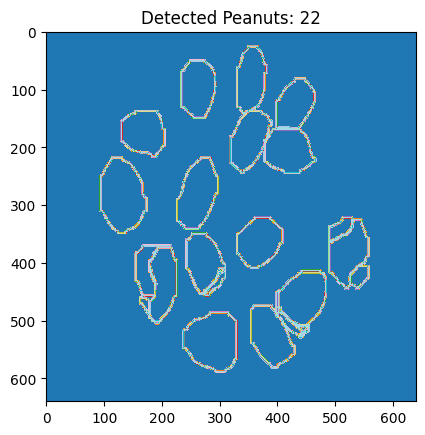

Peanut 1: Mold area = 0 pixels, Total area = 5286 pixels, Mold percentage = 0.00%
Peanut 2: Mold area = 0 pixels, Total area = 7564 pixels, Mold percentage = 0.00%
Peanut 3: Mold area = 0 pixels, Total area = 4384 pixels, Mold percentage = 0.00%
Peanut 4: Mold area = 0 pixels, Total area = 4811 pixels, Mold percentage = 0.00%
Peanut 5: Mold area = 0 pixels, Total area = 5206 pixels, Mold percentage = 0.00%
Peanut 6: Mold area = 0 pixels, Total area = 7878 pixels, Mold percentage = 0.00%
Peanut 7: Mold area = 0 pixels, Total area = 6256 pixels, Mold percentage = 0.00%
Peanut 8: Mold area = 0 pixels, Total area = 5195 pixels, Mold percentage = 0.00%
Peanut 9: Mold area = 0 pixels, Total area = 4948 pixels, Mold percentage = 0.00%
Peanut 10: Mold area = 0 pixels, Total area = 5659 pixels, Mold percentage = 0.00%
Peanut 11: Mold area = 0 pixels, Total area = 5056 pixels, Mold percentage = 0.00%
Peanut 12: Mold area = 0 pixels, Total area = 4652 pixels, Mold percentage = 0.00%
Peanut 13: Mo

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming segmentation_mask is the output from your model
mask_array = segmentation_mask.cpu().numpy() if hasattr(segmentation_mask, 'cpu') else segmentation_mask
print(f"Mask array shape: {mask_array.shape}")

# Step 1: Create a combined peanut mask where both class 1 (peanut) and class 2 (mold) are treated as the same instance
# Here, we combine class 1 (peanut) and class 2 (mold) into a single peanut mask.
peanut_mask = np.isin(mask_array, [1, 2]).astype(np.uint8)

# Step 2: Find contours of connected components in the peanut mask for each channel
contours_all = []  # List to hold contours from all the channels
for i in range(mask_array.shape[0]):  # Iterate over all 22 masks
    peanut_mask_channel = peanut_mask[i]  # Get the i-th mask (shape 640x640)

    # Find contours for each peanut mask (including mold areas)
    contours, _ = cv2.findContours(peanut_mask_channel, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Append contours found for this mask to the all contours list
    contours_all.extend(contours)

# Step 3: Filter small contours (optional, to remove noise)
min_contour_area = 100  # Minimum area of a valid contour (adjust this threshold)
contours_all = [cnt for cnt in contours_all if cv2.contourArea(cnt) > min_contour_area]

# Step 4: Visualize contours and count the number of detected peanuts
num_peanuts = len(contours_all)

# Create a blank image to draw all contours
contour_image = np.zeros_like(peanut_mask[0])  # Blank image to draw contours on

# Draw contours on the image for visualization
cv2.drawContours(contour_image, contours_all, -1, (255), thickness=2)

# Step 5: Show the contour image with all detected peanuts
plt.imshow(contour_image, cmap='tab20')  # Use 'tab20' for distinct colors
plt.title(f"Detected Peanuts: {num_peanuts}")
plt.show()

# Step 6: Calculate the mold area for each detected peanut
mold_area_per_peanut = []
total_area_per_peanut = []

for contour in contours_all:
    # Create a blank mask for this contour
    contour_mask = np.zeros(peanut_mask.shape[1:], dtype=np.uint8)

    # Fill the contour with white (255) to isolate the peanut region
    cv2.drawContours(contour_mask, [contour], -1, 255, thickness=cv2.FILLED)

    # Calculate the total area (peanut + mold) - considering class 1 (peanut) and class 2 (mold) as part of the peanut
    total_area = np.sum(contour_mask == 255)

    # Calculate the mold area (only class 2)
    mold_area = np.sum(np.isin(mask_array, [2]) & contour_mask == 255)

    # Append the areas to lists
    mold_area_per_peanut.append(mold_area)
    total_area_per_peanut.append(total_area)

# Step 7: Calculate mold percentage for each infected peanut
mold_percentage = [(mold_area / total_area) * 100 for mold_area, total_area in zip(mold_area_per_peanut, total_area_per_peanut)]

# Step 8: Display the mold percentage for each peanut
for i, percentage in enumerate(mold_percentage):
    print(f"Peanut {i+1}: Mold area = {mold_area_per_peanut[i]} pixels, Total area = {total_area_per_peanut[i]} pixels, Mold percentage = {percentage:.2f}%")

# Step 9: Print the total peanut count
print(f"Total Peanuts Detected (with mold and unmolded): {num_peanuts}")


In [ ]:
Peanut_areas = []
for i in range(1, num_peanuts):  # Skip background (label 0)
    peanut_instance = (peanut_labels == i)

    # Moldy area
    mold_area = np.sum((segmentation_output == 1) & peanut_instance)

    # Total area (moldy + unmoldy)
    total_area = np.sum(peanut_instance)

   peanut_areas.append({'corn_id': i, 'mold_area': mold_area, 'total_area': total_area})


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 11)

Mask array shape: (22, 640, 640)


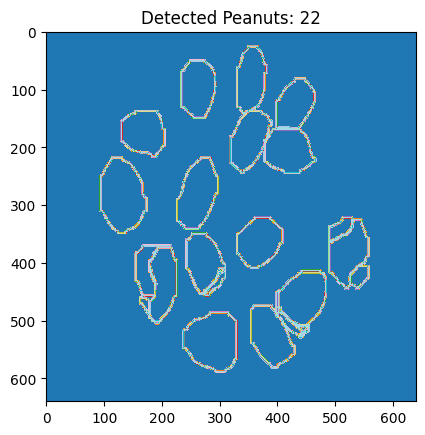

Peanut 1: Mold area = 0 pixels, Total area = 5286 pixels, Mold percentage = 0.00%
Peanut 2: Mold area = 0 pixels, Total area = 7564 pixels, Mold percentage = 0.00%
Peanut 3: Mold area = 0 pixels, Total area = 4384 pixels, Mold percentage = 0.00%
Peanut 4: Mold area = 0 pixels, Total area = 4811 pixels, Mold percentage = 0.00%
Peanut 5: Mold area = 0 pixels, Total area = 5206 pixels, Mold percentage = 0.00%
Peanut 6: Mold area = 0 pixels, Total area = 7878 pixels, Mold percentage = 0.00%
Peanut 7: Mold area = 0 pixels, Total area = 6256 pixels, Mold percentage = 0.00%
Peanut 8: Mold area = 0 pixels, Total area = 5195 pixels, Mold percentage = 0.00%
Peanut 9: Mold area = 0 pixels, Total area = 4948 pixels, Mold percentage = 0.00%
Peanut 10: Mold area = 0 pixels, Total area = 5659 pixels, Mold percentage = 0.00%
Peanut 11: Mold area = 0 pixels, Total area = 5056 pixels, Mold percentage = 0.00%
Peanut 12: Mold area = 0 pixels, Total area = 4652 pixels, Mold percentage = 0.00%
Peanut 13: Mo

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming segmentation_mask is the output from your model
mask_array = segmentation_mask.cpu().numpy() if hasattr(segmentation_mask, 'cpu') else segmentation_mask
print(f"Mask array shape: {mask_array.shape}")

# Step 1: Combine peanut (class 1) and mold (class 2) into a single combined mask
combined_mask = np.isin(mask_array, [1, 2]).astype(np.uint8)

# Step 2: Find contours of connected components in the combined mask (peanut + mold)
contours_all = []  # List to hold contours of peanuts
for i in range(mask_array.shape[0]):  # Iterate over all masks (e.g., 22 instances)
    peanut_mask_channel = combined_mask[i]  # Get the i-th mask (shape 640x640)

    # Find contours for this mask (treating peanut and mold as part of the same area)
    contours, _ = cv2.findContours(peanut_mask_channel, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Append contours found for this mask to the all contours list
    contours_all.extend(contours)

# Step 3: Filter small contours (optional, to remove noise)
min_contour_area = 100  # Minimum area of a valid contour (you can adjust this threshold)
contours_all = [cnt for cnt in contours_all if cv2.contourArea(cnt) > min_contour_area]

# Step 4: Visualize the contours to see all detected peanuts
num_peanuts = len(contours_all)

# Create a blank image to draw all contours
contour_image = np.zeros_like(combined_mask[0])  # Blank image to draw contours on

# Draw all contours on the image
cv2.drawContours(contour_image, contours_all, -1, (255), thickness=2)

# Show the contours and number of peanuts detected
plt.imshow(contour_image, cmap='tab20')  # Use 'tab20' for distinct colors
plt.title(f"Detected Peanuts: {num_peanuts}")
plt.show()

# Step 5: Calculate the mold area and total area for each peanut (considering mold as part of the peanut)
mold_area_per_peanut = []
total_area_per_peanut = []

# To map contours to mask coordinates
for contour in contours_all:
    # Create a blank mask for this contour
    contour_mask = np.zeros(combined_mask.shape[1:], dtype=np.uint8)

    # Fill the contour with white (255) to isolate the peanut region
    cv2.drawContours(contour_mask, [contour], -1, 255, thickness=cv2.FILLED)

    # Calculate the total area (peanut + mold)
    total_area = np.sum(contour_mask == 255)

    # Calculate the mold area (only class 2, mold) within the contour
    mold_area = np.sum((np.isin(mask_array, [2]) & contour_mask == 255))  # class 2 is mold

    # Append the areas to the lists
    mold_area_per_peanut.append(mold_area)
    total_area_per_peanut.append(total_area)

# Step 6: Calculate mold percentage for each infected peanut
mold_percentage = [(mold_area / total_area) * 100 if total_area > 0 else 0 for mold_area, total_area in zip(mold_area_per_peanut, total_area_per_peanut)]

# Step 7: Display the mold percentage for each peanut
for i, percentage in enumerate(mold_percentage):
    print(f"Peanut {i+1}: Mold area = {mold_area_per_peanut[i]} pixels, Total area = {total_area_per_peanut[i]} pixels, Mold percentage = {percentage:.2f}%")

# Step 8: Print the total peanut count
print(f"Total Peanuts Detected (with mold and unmolded): {num_peanuts}")


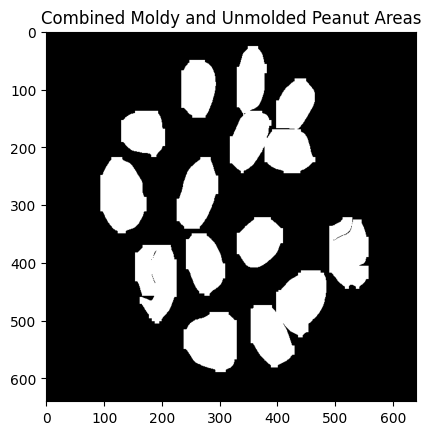

In [ ]:
combined_mask = np.sum(mask_array, axis=0)

# Normalize the combined mask to a binary mask
combined_mask = np.clip(combined_mask, 0, 1)

# Show the combined mask
plt.imshow(combined_mask, cmap='gray')
plt.title("Combined Moldy and Unmolded Peanut Areas")
plt.show()

In [ ]:
moldy_peanut_count = sum(1 for corn in peanut_areas if corn['mold_area'] / corn['total_area'] > 0.1)

print(f"Number of mold-affected corns: {moldy_peanut_count}")


NameError: name 'peanut_areas' is not defined

In [ ]:
project.version(dataset.version).deploy(model_type="yolov11-seg", model_path=f"{HOME}/runs/segment/train/")

In [ ]:
!pip install inference

In [ ]:
import os, random, cv2
import supervision as sv
import IPython
import inference

model_id = project.id.split("/")[1] + "/" + dataset.version
model = inference.get_model(model_id, userdata.get('ROBOFLOW_API_KEY'))

# Location of test set images
test_set_loc = dataset.location + "/test/images/"
test_images = os.listdir(test_set_loc)

# Run inference on 4 random test images, or fewer if fewer images are available
for img_name in random.sample(test_images, min(4, len(test_images))):
    print("Running inference on " + img_name)

    # Load image
    image = cv2.imread(os.path.join(test_set_loc, img_name))

    # Perform inference
    results = model.infer(image)[0]
    detections = sv.Detections.from_inference(results)

    # Annotate boxes and labels
    mask_annotator = sv.MaskAnnotator()
    label_annotator = sv.LabelAnnotator()
    annotated_image = mask_annotator.annotate(scene=image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

    # Display annotated image
    _, ret = cv2.imencode('.jpg', annotated_image)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)


## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.